# IS 4487 Assignment 6: Data Cleaning with Airbnb Listings

In this assignment, you will:
- Load a raw Airbnb listings dataset
- Identify and resolve missing or inconsistent data
- Decide what data to drop, keep, or clean
- Save a clean dataset to use in Assignment 7

## Why This Matters

Data cleaning is one of the most important steps in any analysis — but it's often the least visible. Airbnb hosts, managers, and policy teams rely on clean data to make decisions. This assignment gives you experience cleaning raw data and justifying your choices so others can understand your process.

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Assignments/assignment_06_data_cleaning.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>



## Dataset Description

The dataset you'll be using is a **detailed Airbnb listing file**, available from [Inside Airbnb](https://insideairbnb.com/get-the-data/).

Each row represents one property listing. The columns include:

- **Host attributes** (e.g., host ID, host name, host response time)
- **Listing details** (e.g., price, room type, minimum nights, availability)
- **Location data** (e.g., neighborhood, latitude/longitude)
- **Property characteristics** (e.g., number of bedrooms, amenities, accommodates)
- **Calendar/booking variables** (e.g., last review date, number of reviews)

📌 The schema is consistent across cities, so you can expect similar columns regardless of the location you choose.


## 1. Choose a City & Upload Your Dataset

📥 Follow these steps:

1. Go to: [https://insideairbnb.com/get-the-data/](https://insideairbnb.com/get-the-data/)
2. Choose a city you’re interested in.
3. Download the file named: **`listings.csv.gz`** under that city.
4. In your notebook:
   - Open the left sidebar
   - Click the folder icon 📁
   - Click the upload icon ⬆️ and choose your `listings.csv.gz` file
5. Use the file path `/content/listings.csv.gz` when loading your data.
6. Import standard libraries (`pandas`, `numpy`, `seaborn`, `matplotlib`)


In [20]:
# Import necessary libraries 🔧
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
# Load your uploaded file (path "/content/listings.csv.gz") 🔧
df = pd.read_csv("/content/listings (1).csv.gz")

## 2. Explore Missing Values

Business framing:

Stakeholders don’t like surprises in the data. Missing values can break dashboards, confuse pricing models, or create blind spots for host managers.

Explore how complete your dataset is:
- Count the null values of each column
- Create visuals (e.g. heatmaps, boxplots, bar charts, etc) to help show what columns are missing values
- Keep in mind which column(s) are missing too much data, you will delete these in the next step

### In your markdown:
1. What are the top 3 columns with the most missing values?
2. Which ones are likely to create business issues?
3. Which could be safely ignored or dropped?



In [30]:
# Add code here 🔧
# Count null values for each column
null_counts = df.isnull().sum()

# Display columns with null values
print("Columns with missing values:")
print(null_counts[null_counts > 0])


Columns with missing values:
description                      738
neighborhood_overview           9773
host_name                          3
host_since                         3
host_location                   4376
host_about                      6775
host_response_time              2890
host_response_rate              2890
host_acceptance_rate            2744
host_is_superhost                567
host_thumbnail_url                 3
host_picture_url                   3
host_neighbourhood              9776
host_listings_count                3
host_total_listings_count          3
host_verifications                 3
host_has_profile_pic               3
host_identity_verified             3
neighbourhood                   9773
bathrooms                       3985
bathrooms_text                     8
bedrooms                        2057
beds                            4053
price                           4014
minimum_minimum_nights             4
maximum_minimum_nights             4
minimum_m

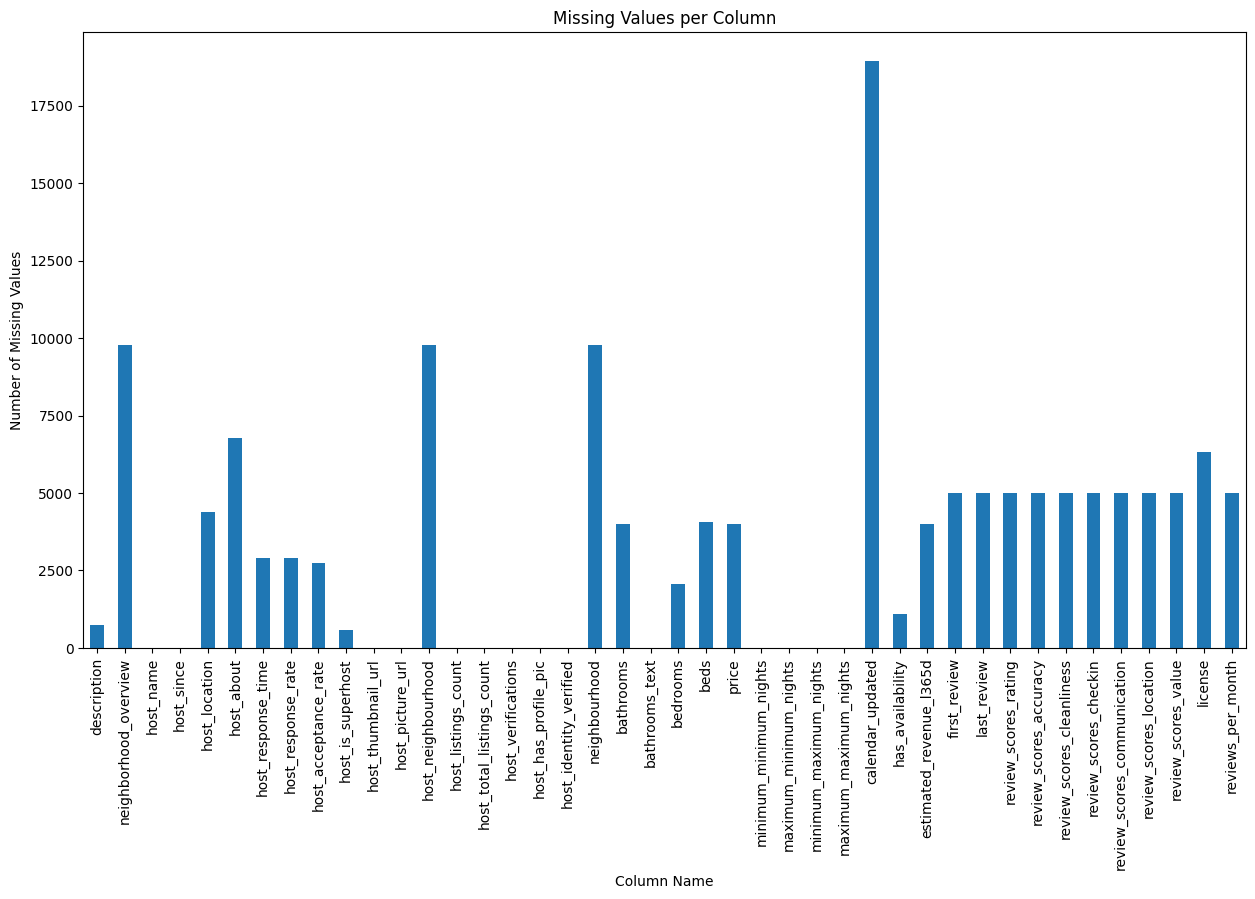

In [31]:
# Create a bar chart of null counts
plt.figure(figsize=(15, 8))
null_counts[null_counts > 0].plot(kind='bar')
plt.title('Missing Values per Column')
plt.xlabel('Column Name')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=90)
plt.show()

### ✍️ Your Response: 🔧
1. calendar_updated , host_neighbourhood, and neighbourhood_overview

2. columns like calendar_updates, and host_neighbourhood because of the high numbers of missing values

3. calendar_updated because of the high number of missing values and I beleive it's not important for analysing performance


## 3. Drop Columns That Aren’t Useful

Business framing:  

Not every column adds value. Analysts often remove columns that are too empty, irrelevant, or repetitive — especially when preparing data for others.

Make a decision:

- Choose 2–4 columns to drop from your dataset
- Document your reasons for each one
- Confirm they're gone with `.head()` or `.info()`

### In Your Response:
1. Which columns did you drop?
2. Why were they not useful from a business perspective?
3. What could go wrong if you left them in?



In [32]:
# Add code here 🔧
# Choose columns to drop
columns_to_drop = ['calendar_updated', 'license', 'scrape_id']

# Drop the selected columns
df = df.drop(columns=columns_to_drop)

# Confirm columns are dropped by displaying the head of the DataFrame
display(df.head())

,id,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,18674,https://www.airbnb.com/rooms/18674,2025-06-21,city scrape,Huge flat for 8 people close to Sagrada Familia,110m2 apartment to rent in Barcelona. Located ...,Apartment in Barcelona located in the heart of...,https://a0.muscache.com/pictures/13031453/413c...,71615,https://www.airbnb.com/users/show/71615,...,4.62,4.60,4.81,4.28,t,28,28,0,0,0.33
1,23197,https://www.airbnb.com/rooms/23197,2025-06-23,city scrape,"Forum CCIB DeLuxe, Spacious, Large Balcony, relax",Beautiful and Spacious Apartment with Large Te...,"Strategically located in the Parc del Fòrum, a...",https://a0.muscache.com/pictures/miso/Hosting-...,90417,https://www.airbnb.com/users/show/90417,...,4.94,4.99,4.65,4.68,f,1,1,0,0,0.51
2,32711,https://www.airbnb.com/rooms/32711,2025-06-22,city scrape,Sagrada Familia area - Còrsega 1,A lovely two bedroom apartment only 250 m from...,What's nearby <br />This apartment is located...,https://a0.muscache.com/pictures/357b25e4-f414...,135703,https://www.airbnb.com/users/show/135703,...,4.88,4.89,4.89,4.47,f,3,3,0,0,0.87
3,34241,https://www.airbnb.com/rooms/34241,2025-06-22,city scrape,Stylish Top Floor Apartment - Ramblas Plaza Real,Located in close proximity to Plaza Real and L...,NaN,https://a0.muscache.com/pictures/2437facc-2fe7...,73163,https://www.airbnb.com/users/show/73163,...,4.68,4.68,4.73,4.23,f,3,3,0,0,0.14
4,347824,https://www.airbnb.com/rooms/347824,2025-06-22,city scrape,"Ideal Happy Location Barceloneta Beach, Old Town!",Please send us a message to confirm availabili...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,1447144,https://www.airbnb.com/users/show/1447144,...,2.67,3.67,5.00,4.00,f,355,355,0,0,0.02


### ✍️ Your Response: 🔧
1. Which columns did you drop?
I dropped `calendar_updated`, `license`, and `scrape_id`.
2. Why were they not useful from a business perspective?
`calendar_updated` had a very high number of missing values and might not be relevant for analyzing listing characteristics or performance. `license` also had a large number of missing values and might not be applicable to all listing types or locations. `scrape_id` is a technical identifier and not useful for business analysis.
3. What could go wrong if you left them in?
Leaving in columns with a high number of missing values can complicate analysis and potentially skew results if not handled properly. Irrelevant columns add noise and increase the dataset size unnecessarily.

## 4. Fill or Fix Values in Key Columns

Business framing:  

Let’s say your manager wants to see a map of listings with prices and review scores. If key fields are blank, the map won’t work. But not all missing values should be filled the same way.

- Choose 2 columns with missing values
- Use a strategy to fill or flag those values
  - (e.g., median, “unknown”, forward-fill, or a placeholder)
- Explain what you did and why

### In your response:
1. What two columns did you clean?
2. What method did you use for each, and why?
3. What risks are there in how you filled the data?

In [33]:
# Your code for converting column data types 🔧
# Fill missing values in 'bedrooms' with the median
median_bedrooms = df['bedrooms'].median()
df['bedrooms'].fillna(median_bedrooms, inplace=True)

# Fill missing values in 'bathrooms_text' with 'Unknown'
df['bathrooms_text'].fillna('Unknown', inplace=True)

# Verify the changes
print("Missing values after filling:")
print(df[['bedrooms', 'bathrooms_text']].isnull().sum())

Missing values after filling:
bedrooms          0
bathrooms_text    0
dtype: int64


/tmp/ipython-input-2236991751.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bedrooms'].fillna(median_bedrooms, inplace=True)
/tmp/ipython-input-2236991751.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [34]:
display(df.head())

,id,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,18674,https://www.airbnb.com/rooms/18674,2025-06-21,city scrape,Huge flat for 8 people close to Sagrada Familia,110m2 apartment to rent in Barcelona. Located ...,Apartment in Barcelona located in the heart of...,https://a0.muscache.com/pictures/13031453/413c...,71615,https://www.airbnb.com/users/show/71615,...,4.62,4.60,4.81,4.28,t,28,28,0,0,0.33
1,23197,https://www.airbnb.com/rooms/23197,2025-06-23,city scrape,"Forum CCIB DeLuxe, Spacious, Large Balcony, relax",Beautiful and Spacious Apartment with Large Te...,"Strategically located in the Parc del Fòrum, a...",https://a0.muscache.com/pictures/miso/Hosting-...,90417,https://www.airbnb.com/users/show/90417,...,4.94,4.99,4.65,4.68,f,1,1,0,0,0.51
2,32711,https://www.airbnb.com/rooms/32711,2025-06-22,city scrape,Sagrada Familia area - Còrsega 1,A lovely two bedroom apartment only 250 m from...,What's nearby <br />This apartment is located...,https://a0.muscache.com/pictures/357b25e4-f414...,135703,https://www.airbnb.com/users/show/135703,...,4.88,4.89,4.89,4.47,f,3,3,0,0,0.87
3,34241,https://www.airbnb.com/rooms/34241,2025-06-22,city scrape,Stylish Top Floor Apartment - Ramblas Plaza Real,Located in close proximity to Plaza Real and L...,NaN,https://a0.muscache.com/pictures/2437facc-2fe7...,73163,https://www.airbnb.com/users/show/73163,...,4.68,4.68,4.73,4.23,f,3,3,0,0,0.14
4,347824,https://www.airbnb.com/rooms/347824,2025-06-22,city scrape,"Ideal Happy Location Barceloneta Beach, Old Town!",Please send us a message to confirm availabili...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,1447144,https://www.airbnb.com/users/show/1447144,...,2.67,3.67,5.00,4.00,f,355,355,0,0,0.02


### ✍️ Your Response: 🔧
1. What two columns did you clean?
I cleaned the `bedrooms` and `bathrooms_text` columns.
2. What method did you use for each, and why?
For `bedrooms`, I used the median to fill missing values because it's a numerical column and the median is less affected by outliers than the mean. For `bathrooms_text`, I used the placeholder 'Unknown' because it's a categorical column and filling with a specific value like the mode might misrepresent the data if 'Unknown' is a significant category.
3. What risks are there in how you filled the data?
Filling missing numerical data with the median can underestimate or overestimate the actual values if the missing data is not randomly distributed. Filling categorical data with 'Unknown' adds a new category that might need to be handled differently in analysis and visualization. Both methods can introduce bias into the dataset if the missing data is related to other variables.

## 5. Convert and Clean Data Types

Business framing:  

Sometimes columns that look like numbers are actually stored as text — which breaks calculations and slows down analysis. Common examples are price columns with dollar signs or availability stored as strings.

- Identify one column with the wrong data type
- Clean and convert it into a usable format (e.g., from string to number)
- Check your work by summarizing or plotting the cleaned column

### In Your Response: :
1. What column did you fix?
2. What cleaning steps did you apply?
3. How does this help prepare the data for later use?


In [36]:
# Clean or adjust your dataset 🔧
# Identify and clean the 'price' column
print(f"Data type of 'price' before cleaning: {df['price'].dtype}")

# Remove '$' and ',' from 'price', replace 'nan' strings with NaN, and convert to numeric
df['price'] = df['price'].astype(str).str.replace('$', '').str.replace(',', '')
df['price'] = df['price'].replace('nan', np.nan) # Replace 'nan' strings with actual NaN
df['price'] = pd.to_numeric(df['price'])

# Verify the data type and summarize the cleaned column
print(f"Data type of 'price' after cleaning: {df['price'].dtype}")
print("\nSummary of cleaned 'price' column:")
display(df['price'].describe())

Data type of 'price' before cleaning: object
Data type of 'price' after cleaning: float64

Summary of cleaned 'price' column:


,price
count,14913.000000
mean,214.380071
std,385.402591
min,9.000000
25%,74.000000
50%,143.000000
75%,256.000000
max,10000.000000


### ✍️ Your Response: 🔧
1. What column did you fix?
I fixed the `price` column.
2. What cleaning steps did you apply?
I removed the '$' and ',' characters from the `price` column and converted it to a numeric data type. I also replaced 'nan' strings with actual NaN values before the conversion.
3. How does this help prepare the data for later use?
Converting the `price` column to a numeric data type allows for mathematical operations and analysis, such as calculating the average price, finding the range of prices, or using price in statistical models. Having it as a string would prevent these types of analyses.

## 6. Remove Duplicate Records

Business framing:  

If a listing appears twice, it could inflate revenue estimates or confuse users. Airbnb needs each listing to be unique and accurate.

- Check for rows that are exact duplicates
- If your data has an ID column and each ID is supposed to unique, then make sure there are no duplicate IDs
- Remove duplicates if found

### In your markdown:
1. Did you find duplicates?
2. How did you decide what to drop or keep?
3. Why are duplicates risky for Airbnb teams?


In [38]:
# Add code here 🔧
# Check for exact duplicate rows
num_duplicates = df.duplicated().sum()
print(f"Number of exact duplicate rows: {num_duplicates}")

Number of exact duplicate rows: 0


In [39]:


# Remove exact duplicate rows
if num_duplicates > 0:
    df.drop_duplicates(inplace=True)
    print("Exact duplicate rows removed.")
    print(f"Number of rows after removing duplicates: {len(df)}")
else:
    print("No exact duplicate rows found.")

# Check for duplicate IDs if 'id' column exists and is expected to be unique
if 'id' in df.columns:
    num_duplicate_ids = df['id'].duplicated().sum()
    print(f"\nNumber of duplicate IDs: {num_duplicate_ids}")
    if num_duplicate_ids > 0:
        print("Warning: Duplicate IDs found. This might indicate an issue if each ID should be unique.")

No exact duplicate rows found.

Number of duplicate IDs: 0


### ✍️ Your Response: 🔧

1. Did you find duplicates?
No, I did not find any exact duplicate rows or duplicate IDs in the dataset.

2. How did you decide what to drop or keep?
Since no duplicates were found, there was no need to decide what to drop or keep.

3. Why are duplicates risky for Airbnb teams?
Duplicate listings can lead to inflated metrics for things like available properties, revenue, or review counts, resulting in inaccurate reporting. They can also negatively impact user experience by showing the same listing multiple times.

## 7. Export Cleaned Data

Before wrapping up, export your cleaned Airbnb dataset to a CSV file. You'll need this file for **Assignment 7**, where you'll perform data transformation techniques.

Make sure your data has:
- Cleaned and consistent column values
- Proper data types for each column
- Any unnecessary columns removed

This file should be the version of your dataset that you’d feel confident sharing with a teammate or using for deeper analysis.



```
# Explanation:
# - "cleaned_airbnb_data.csv" is the name of the file that will be saved
# - index=False prevents pandas from writing row numbers into the CSV
# - The file will be saved to your working directory (in Colab, you'll need to download it manually. Once you see the data in your files tab, just click on the three dots, then click “download”)
# - YOU MAY NEED TO PRESS “RUN” MULTIPLE TIMES IN ORDER FOR IT TO SHOW UP
# - FOR SOME DEVICES, IT MAY TAKE A FEW MINUTES BEFORE YOUR FILE SHOWS UP

```





In [40]:
# export csv here 🔧
df.to_csv("cleaned_airbnb_data.csv", index=False)

## 8. Final Reflection

You’ve just cleaned a real-world Airbnb dataset — the kind of work that happens every day in analyst and data science roles.

Before you move on to data transformation in Assignment 7, take a few moments to reflect on the decisions you made and what you learned.

### In your markdown:
1. What was the most surprising or challenging part of cleaning this dataset?
2. How did you decide which data to drop, fix, or keep?
3. What’s one way a business team (e.g., hosts, pricing analysts, platform ops) might benefit from the cleaned version of this data?
4. If you had more time, what would you explore or clean further?
5. How does this relate to your customized learning outcome you created in canvas?


Write your response clearly in full sentences. No more than a few sentences required per response.


### ✍️ Your Response: 🔧

1. I was surprised with the dataset having no duplicates
2. I decided to drop the data with the most amount of missing values along with the column that does not influence analyzing performance
3. A business team can now use this data set to make good business decisions. This dataset is free of errors or mistakes  
4. I would look into the correlation between each column and see whether there can be more filtering with the data
5. This relates to my customized learning outcome that I created in canvas because Im given a huge dataset and i need to filter and clean the dataset to answer the business problem. In order to answer the business problem the most accurately, there needs to be data cleaning beforehand.


## Submission Instructions
✅ Checklist:
- All code cells run without error
- All markdown responses are complete
- Submit on Canvas as instructed

In [41]:
!jupyter nbconvert --to html "assignment_06_MillerAaron.ipynb"

[NbConvertApp] Converting notebook assignment_06_MillerAaron.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 1 image(s).
[NbConvertApp] Writing 474188 bytes to assignment_06_MillerAaron.html
